# Predicting Bankruptcy 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from scipy.stats import skew, kurtosis
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedKFold
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix

In [3]:
df = pd.read_excel("/content/Bankruptcy_data.xlsx")

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 92872 entries, 0 to 92871
Data columns (total 13 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   EPS                 92867 non-null  float64
 1   Liquidity           92625 non-null  float64
 2   Profitability       92625 non-null  float64
 3   Productivity        92625 non-null  float64
 4   Leverage Ratio      92846 non-null  float64
 5   Asset Turnover      92625 non-null  float64
 6   Operational Margin  87315 non-null  float64
 7   Return on Equity    92864 non-null  float64
 8   Market Book Ratio   92815 non-null  float64
 9   Assets Growth       86171 non-null  float64
 10  Sales Growth        86171 non-null  float64
 11  Employee Growth     85862 non-null  float64
 12  BK                  92872 non-null  int64  
dtypes: float64(12), int64(1)
memory usage: 9.2 MB


In [4]:
df.duplicated()
df.drop_duplicates()

,EPS,Liquidity,Profitability,Productivity,Leverage Ratio,Asset Turnover,Operational Margin,Return on Equity,Market Book Ratio,Assets Growth,Sales Growth,Employee Growth,BK
0,1.580000,0.360000,0.180000,0.130000,1.330000,1.770000,0.070000,0.150000,2.220000,NaN,NaN,NaN,0
1,1.410000,0.360000,0.190000,0.120000,1.310000,1.590000,0.070000,0.130000,2.410000,0.126319,0.014278,0.040179,0
2,0.310000,0.320000,0.130000,0.080000,1.030000,1.550000,0.050000,0.040000,2.560000,0.368077,0.327909,0.566524,0
3,0.710000,0.280000,0.140000,0.080000,0.800000,1.390000,0.060000,0.050000,5.280000,-0.020809,-0.118904,-0.095890,0
4,0.750000,0.410000,0.130000,0.080000,0.200000,1.300000,0.060000,0.040000,8.680000,0.233089,0.146807,0.053030,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
92867,-1.488171,-0.015494,-0.758859,-0.056905,-1042.104918,0.174115,-0.326823,-6.614095,-1.846719,-0.073287,-0.557483,-0.076923,0
92868,-1.807630,0.093838,-1.204734,-0.121122,-4.530214,0.215844,-0.561155,-4.519074,-2.474549,-0.201835,-0.010544,-0.208333,0
92869,-0.015660,0.039260,0.000000,-0.082429,0.744907,0.254186,-0.324286,-0.569448,3274.505633,-0.168001,-0.020206,-0.105263,0
92870,-0.133054,0.053678,-0.029471,0.000998,0.574570,0.195683,0.005101,-0.085842,36.474842,0.076936,-0.170928,-0.058824,0


In [ ]:
df.duplicated()

0        False
1        False
2        False
3        False
4        False
         ...  
92867    False
92868    False
92869    False
92870    False
92871    False
Length: 92872, dtype: bool

## EDA

Statistic Summary for All Company

In [ ]:
df.describe()

,EPS,Liquidity,Profitability,Productivity,Leverage Ratio,Asset Turnover,Operational Margin,Return on Equity,Market Book Ratio,Assets Growth,Sales Growth,Employee Growth,BK
count,92867.000000,92625.000000,92625.000000,92625.000000,92846.000000,92625.000000,87315.000000,92864.000000,9.281500e+04,86171.000000,86171.000000,85862.000000,92872.000000
mean,-14.461355,-2.631237,-29.537274,-1.222870,1.345316,1.053613,-7.915485,-2.112382,3.585063e+02,1.294075,1.900108,0.343322,0.006008
std,2195.467288,121.610921,677.230667,35.885556,253.038093,2.115945,214.460079,352.596902,2.606364e+04,73.769522,177.632638,14.074156,0.077280
min,-384000.000000,-25968.520000,-79682.000000,-5093.000000,-7811.000000,-31.590000,-30175.700000,-88875.140000,-3.151500e+06,-1.000000,-27.431034,-1.000000,0.000000
25%,-0.140000,0.020000,-0.640000,-0.060000,0.000000,0.390000,-0.030000,-0.080000,1.120000e+01,-0.052596,-0.033522,-0.048107,0.000000
50%,0.330000,0.190000,0.070000,0.060000,0.280000,0.830000,0.060000,0.030000,5.828000e+01,0.051844,0.059733,0.017241,0.000000
75%,1.530000,0.400000,0.310000,0.110000,0.820000,1.390000,0.140000,0.070000,2.401400e+02,0.192062,0.204231,0.130944,0.000000
max,55339.000000,1.000000,140.580000,1102.000000,75970.380000,276.380000,394.470000,39500.000000,3.455419e+06,14231.000000,39850.000000,2699.000000,1.000000


Statistic Summary for Non Bankruptcy companies

In [ ]:
dfbkf = df[df['BK'] == 0]
dfbkf.describe()

,EPS,Liquidity,Profitability,Productivity,Leverage Ratio,Asset Turnover,Operational Margin,Return on Equity,Market Book Ratio,Assets Growth,Sales Growth,Employee Growth,BK
count,92313.000000,92067.000000,92067.000000,92067.000000,92289.000000,92067.000000,86774.000000,92310.000000,9.226600e+04,85613.000000,85613.000000,85376.000000,92314.0
mean,-13.231823,-2.642535,-29.666632,-1.226630,1.348228,1.051111,-7.945216,-1.934013,3.602796e+02,1.302374,1.902797,0.341756,0.0
std,2160.213555,121.977245,679.260465,35.993109,253.794101,2.119542,215.106701,352.451641,2.614102e+04,74.009406,178.204545,14.102904,0.0
min,-384000.000000,-25968.520000,-79682.000000,-5093.000000,-7811.000000,-31.590000,-30175.700000,-88875.140000,-3.151500e+06,-1.000000,-27.431034,-1.000000,0.0
25%,-0.140000,0.020000,-0.620000,-0.060000,0.000000,0.390000,-0.030000,-0.080000,1.152000e+01,-0.050736,-0.032159,-0.047482,0.0
50%,0.340000,0.190000,0.070000,0.060000,0.280000,0.820000,0.060000,0.030000,5.895000e+01,0.052488,0.060257,0.017621,0.0
75%,1.540000,0.400000,0.310000,0.110000,0.820000,1.380000,0.140000,0.070000,2.418575e+02,0.192559,0.204566,0.131116,0.0
max,55339.000000,1.000000,140.580000,1102.000000,75970.380000,276.380000,394.470000,39500.000000,3.455419e+06,14231.000000,39850.000000,2699.000000,0.0


Statistic Summary for Bankruptcy companies

In [ ]:
dfbkt = df[df['BK'] == 1]
dfbkt.describe()

,EPS,Liquidity,Profitability,Productivity,Leverage Ratio,Asset Turnover,Operational Margin,Return on Equity,Market Book Ratio,Assets Growth,Sales Growth,Employee Growth,BK
count,554.000000,558.000000,558.000000,558.000000,557.000000,558.000000,541.000000,554.000000,549.000000,558.000000,558.000000,486.000000,558.0
mean,-219.338251,-0.767256,-8.193908,-0.602488,0.862939,1.466490,-3.146859,-31.832970,60.481545,0.020853,1.487656,0.618409,1.0
std,5515.358574,7.947145,62.437222,3.447736,23.294360,1.339911,37.692772,375.173142,561.708137,1.173895,18.182351,7.471536,0.0
min,-129042.500000,-173.266667,-1006.333333,-71.988636,-326.490506,0.000000,-809.400000,-7590.735294,-2562.150000,-0.980670,-1.000000,-1.000000,1.0
25%,-2.114895,-0.432507,-1.970603,-0.411613,-1.134373,0.544254,-0.438217,-2.748956,-3.332771,-0.362441,-0.296623,-0.286502,1.0
50%,-0.662618,-0.043999,-0.717959,-0.138812,0.222032,1.204509,-0.095290,-0.727302,1.331171,-0.150426,-0.069345,-0.108980,1.0
75%,-0.120361,0.165969,-0.148679,-0.019508,1.708333,2.006104,-0.011583,-0.171662,18.067075,0.027317,0.163292,0.087991,1.0
max,13416.000000,0.975717,1.942339,0.601057,297.142857,15.974886,2.888889,504.460175,7464.490000,14.944964,356.788462,127.000000,1.0


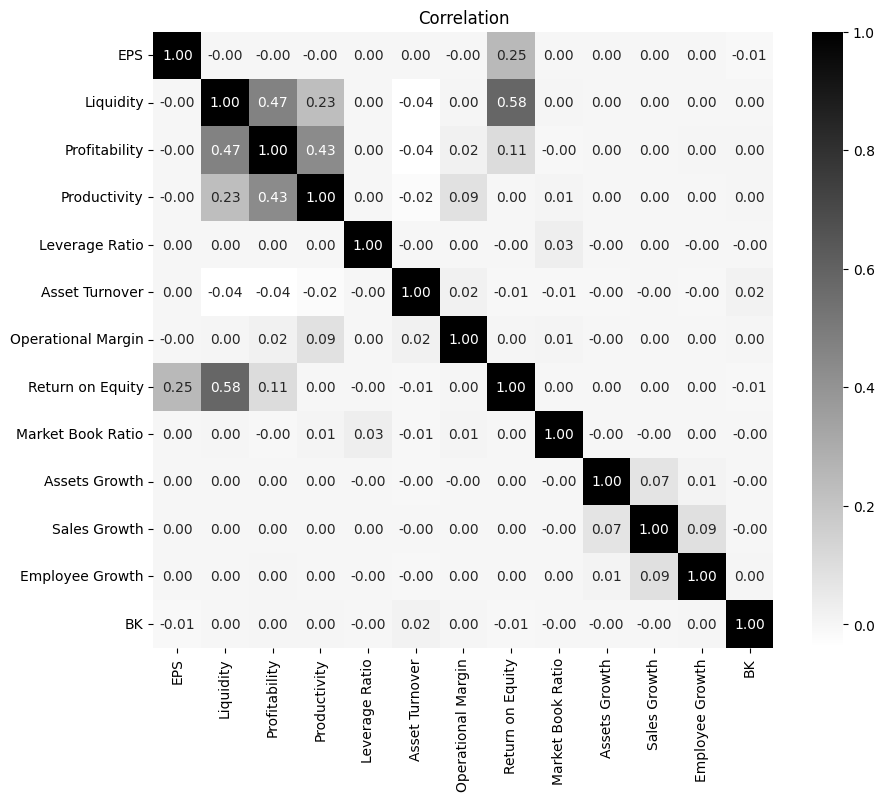

In [5]:
correlation_matrix = df.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='binary', fmt=".2f")
plt.title('Correlation')
plt.show()

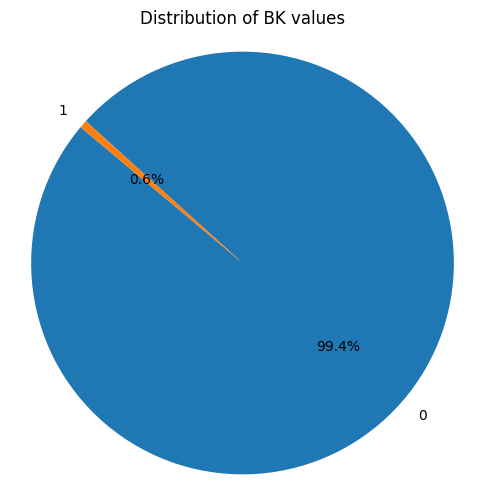

In [ ]:
bk_counts = df['BK'].value_counts()

plt.figure(figsize=(6, 6))  # Adjust the size of the pie chart
plt.pie(bk_counts, labels=bk_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Distribution of BK values')
plt.axis('equal')

plt.show()

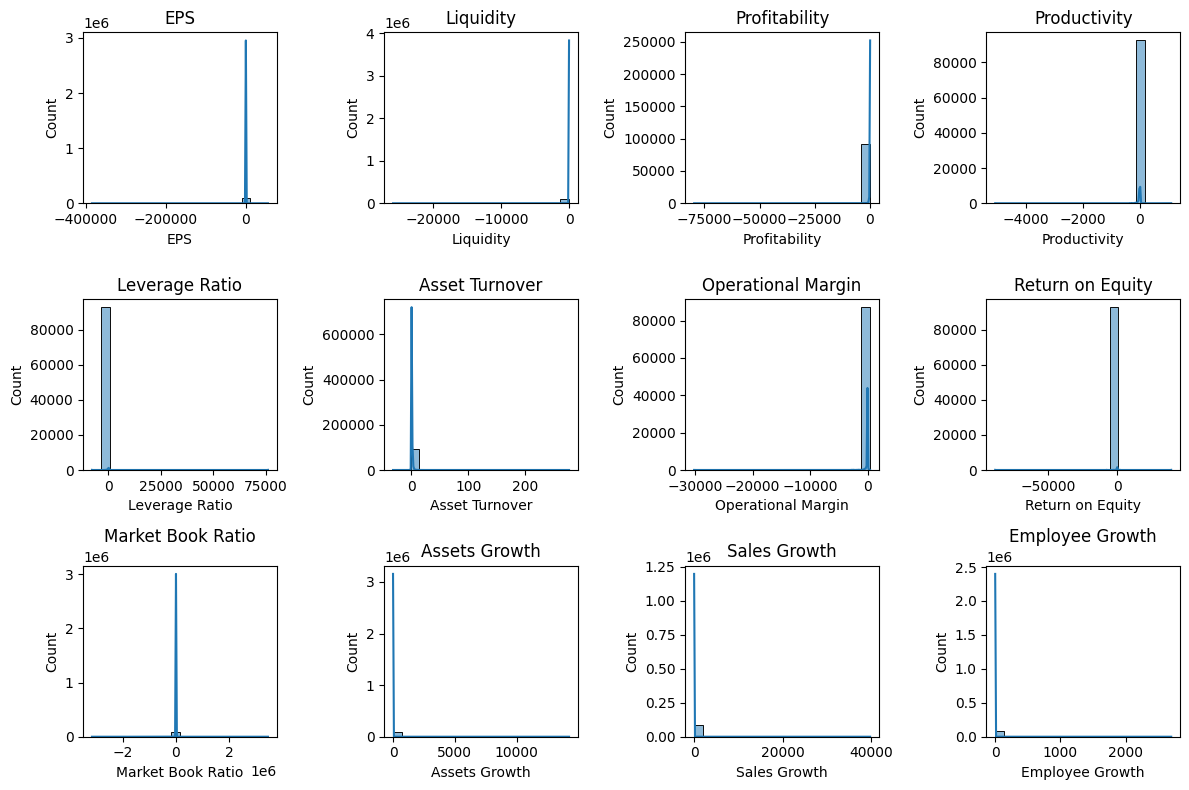

In [ ]:
plt.figure(figsize=(12, 8))
for i, col in enumerate(df.columns[:-1]):
    plt.subplot(3, 4, i+1)
    sns.histplot(df[col], bins=20, kde=True)
    plt.title(col)
plt.tight_layout()
plt.show()

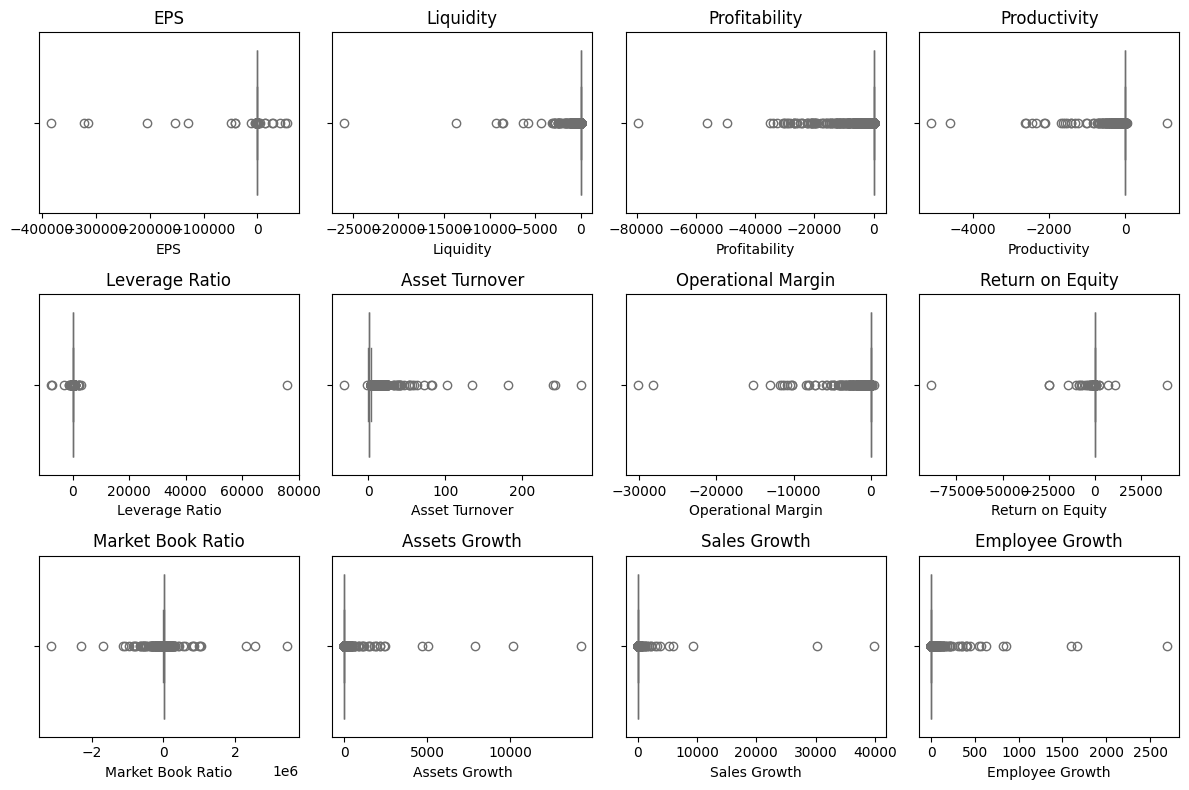

In [ ]:
plt.figure(figsize=(12, 8))
for i, col in enumerate(df.columns[:-1]):  # Exclude the target column
    plt.subplot(3, 4, i+1)  # Adjust the subplot grid as per your preference
    sns.boxplot(x=df[col], color='skyblue')  # Corrected 'boxplox' to 'boxplot', added 'x=' to specify the data
    plt.title(col)
plt.tight_layout()
plt.show()

## Data Pocessing



## Model Selection

In [ ]:
from sklearn.model_selection import train_test_split

X = df.drop('BK', axis=1)
y = df['BK']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## Spot Check

In [ ]:
from imblearn.pipeline import Pipeline as ImbPipeline
from sklearn.preprocessing import RobustScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import classification_report, confusion_matrix
from imblearn.over_sampling import SMOTE
from sklearn.impute import IterativeImputer

# Define the imbalanced-learn pipeline
pipeline = ImbPipeline([
    ('imputer', IterativeImputer(random_state=42)),
    ('scaler', RobustScaler()),
    ('classifier', RandomForestClassifier(random_state=42))
])

# Define the list of classifiers
classifiers = [
    RandomForestClassifier(random_state=42),
    SVC(random_state=42),
    LogisticRegression(random_state=42),
    LinearDiscriminantAnalysis(),
    GradientBoostingClassifier(random_state=42)
]

# Perform model spot checking
for i, classifier in enumerate(classifiers):
    print(f"Model {i+1}: {classifier.__class__.__name__}")
    pipeline.set_params(classifier=classifier)
    pipeline.fit(X_train, y_train)
    y_pred = pipeline.predict(X_test)
    print("Model Score:", pipeline.score(X_test, y_test))
    print("Classification Report:")
    print(classification_report(y_test, y_pred))
    print("Confusion Matrix:")
    print(confusion_matrix(y_test, y_pred))
    print()

Model 1: RandomForestClassifier
Model Score: 0.9938088829071332
Classification Report:
              precision    recall  f1-score   support

           0       0.99      1.00      1.00     18461
           1       0.33      0.01      0.02       114

    accuracy                           0.99     18575
   macro avg       0.66      0.50      0.51     18575
weighted avg       0.99      0.99      0.99     18575

Confusion Matrix:
[[18459     2]
 [  113     1]]

Model 2: SVC
Model Score: 0.9938627187079407
Classification Report:
              precision    recall  f1-score   support

           0       0.99      1.00      1.00     18461
           1       0.00      0.00      0.00       114

    accuracy                           0.99     18575
   macro avg       0.50      0.50      0.50     18575
weighted avg       0.99      0.99      0.99     18575

Confusion Matrix:
[[18461     0]
 [  114     0]]

Model 3: LogisticRegression


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_lo

Model Score: 0.9914939434724092
Classification Report:
              precision    recall  f1-score   support

           0       0.99      1.00      1.00     18461
           1       0.06      0.03      0.04       114

    accuracy                           0.99     18575
   macro avg       0.53      0.51      0.52     18575
weighted avg       0.99      0.99      0.99     18575

Confusion Matrix:
[[18414    47]
 [  111     3]]

Model 4: LinearDiscriminantAnalysis
Model Score: 0.9936473755047106
Classification Report:
              precision    recall  f1-score   support

           0       0.99      1.00      1.00     18461
           1       0.00      0.00      0.00       114

    accuracy                           0.99     18575
   macro avg       0.50      0.50      0.50     18575
weighted avg       0.99      0.99      0.99     18575

Confusion Matrix:
[[18457     4]
 [  114     0]]

Model 5: GradientBoostingClassifier
Model Score: 0.9928936742934051
Classification Report:
         

Checking Shape of y

(array([73853.,     0.,     0.,     0.,     0.,     0.,     0.,     0.,
            0.,   444.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <BarContainer object of 10 artists>)

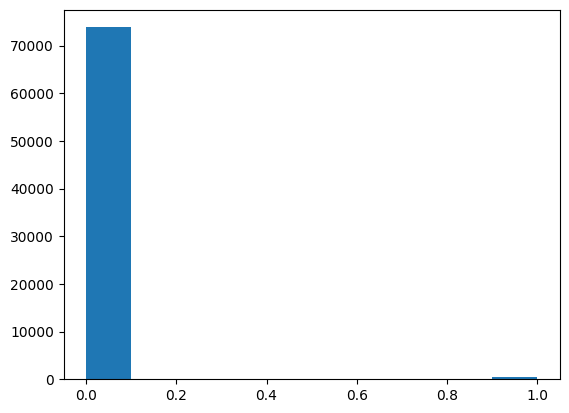

In [ ]:
plt.hist(y_train)

# Spot Check with Resampling

In [ ]:
from imblearn.pipeline import Pipeline as ImbPipeline
from sklearn.preprocessing import RobustScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import classification_report, confusion_matrix
from imblearn.over_sampling import SMOTE
from sklearn.impute import IterativeImputer

# Define the imbalanced-learn pipeline
pipeline = ImbPipeline([
    ('imputer', IterativeImputer(random_state=42)),
    ('scaler', RobustScaler()),
    ('sampling', SMOTE(random_state=42)),
    ('classifier', RandomForestClassifier(random_state=42))
])

# Define the list of classifiers
classifiers = [
    RandomForestClassifier(random_state=42),
    SVC(random_state=42),
    LogisticRegression(random_state=42),
    LinearDiscriminantAnalysis(),
    GradientBoostingClassifier(random_state=42)
]

# Perform model spot checking
for i, classifier in enumerate(classifiers):
    print(f"Model {i+1}: {classifier.__class__.__name__}")
    pipeline.set_params(classifier=classifier)
    pipeline.fit(X_train, y_train)
    y_pred = pipeline.predict(X_test)
    print("Model Score:", pipeline.score(X_test, y_test))
    print("Classification Report:")
    print(classification_report(y_test, y_pred))
    print("Confusion Matrix:")
    print(confusion_matrix(y_test, y_pred))
    print()

Model 1: RandomForestClassifier
Model Score: 0.9844952893674294
Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.99      0.99     18461
           1       0.13      0.27      0.18       114

    accuracy                           0.98     18575
   macro avg       0.56      0.63      0.58     18575
weighted avg       0.99      0.98      0.99     18575

Confusion Matrix:
[[18256   205]
 [   83    31]]

Model 2: SVC
Model Score: 0.9761507402422611
Classification Report:
              precision    recall  f1-score   support

           0       0.99      0.98      0.99     18461
           1       0.05      0.17      0.08       114

    accuracy                           0.98     18575
   macro avg       0.52      0.57      0.53     18575
weighted avg       0.99      0.98      0.98     18575

Confusion Matrix:
[[18113   348]
 [   95    19]]

Model 3: LogisticRegression


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Model Score: 0.5060026917900404
Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.51      0.67     18461
           1       0.01      0.64      0.02       114

    accuracy                           0.51     18575
   macro avg       0.50      0.57      0.34     18575
weighted avg       0.99      0.51      0.67     18575

Confusion Matrix:
[[9326 9135]
 [  41   73]]

Model 4: LinearDiscriminantAnalysis
Model Score: 0.706164199192463
Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.71      0.83     18461
           1       0.01      0.47      0.02       114

    accuracy                           0.71     18575
   macro avg       0.50      0.59      0.42     18575
weighted avg       0.99      0.71      0.82     18575

Confusion Matrix:
[[13063  5398]
 [   60    54]]

Model 5: GradientBoostingClassifier
Model Score: 0.8913593539703903
Classification Report:
              

# Model Development : Random Forest Classifier

## Model 1: Original

In [ ]:
X_rf = df.drop('BK', axis=1)
y_rf = df['BK']

X_rf_train, X_rf_test, y_rf_train, y_rf_test = train_test_split(X_rf, y_rf, test_size=0.2, random_state=42)

In [ ]:
from imblearn.pipeline import Pipeline as ImbPipeline
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import RobustScaler
from sklearn.decomposition import PCA
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix
from imblearn.over_sampling import SMOTE
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer


# Define the imbalanced-learn pipeline for Random Forest
pipeline_rf = ImbPipeline([
    ('imputer', IterativeImputer(random_state=42)),
    ('scaler', RobustScaler()),
    ('sampling', SMOTE(random_state=42)),
    ('classifier', RandomForestClassifier(random_state=42))
])

# Define the parameter grid for Random Forest
param_grid_rf = {
    'classifier__n_estimators': [50, 100],
    'classifier__max_depth': [None, 10]
}

# Perform GridSearchCV for Random Forest
grid_search_rf = GridSearchCV(estimator=pipeline_rf, param_grid=param_grid_rf, cv = 3, scoring = 'f1_macro', n_jobs = -1)
grid_search_rf.fit(X_rf_train, y_rf_train)

# Get best parameters and best model for Random Forest
best_params_rf = grid_search_rf.best_params_
best_model_rf = grid_search_rf.best_estimator_

# Predict and evaluate for Random Forest
y_rf_pred = best_model_rf.predict(X_rf_test)

# Print best hyperparameters and classification report
print("Best Hyperparameters for Random Forest:", best_params_rf)
print("Best Model Score for Random Forest:", best_model_rf.score(X_rf_test, y_rf_test))
print("Classification Report for Random Forest:")
print(classification_report(y_rf_test, y_rf_pred))
print("Confusion Matrix:")
print(confusion_matrix(y_rf_test, y_rf_pred))
print()

Best Hyperparameters for Random Forest: {'classifier__max_depth': None, 'classifier__n_estimators': 100}
Best Model Score for Random Forest: 0.9843876177658143
Classification Report for Random Forest:
              precision    recall  f1-score   support

           0       1.00      0.99      0.99     18461
           1       0.12      0.24      0.16       114

    accuracy                           0.98     18575
   macro avg       0.56      0.61      0.57     18575
weighted avg       0.99      0.98      0.99     18575

Confusion Matrix:
[[18258   203]
 [   87    27]]



## Model 2: Combning Feature( All Growth Rates)

In [ ]:
df1 = df

In [ ]:
df1['Total Growth'] = df1["Employee Growth"] + df1["Assets Growth"] + df1["Sales Growth"]
columns_to_drop = ['Assets Growth', 'Employee Growth', 'Sales Growth']
df1.drop(columns=columns_to_drop, inplace=True)
print(df1.columns)

Index(['EPS', 'Liquidity', 'Profitability', 'Productivity', 'Leverage Ratio',
       'Asset Turnover', 'Operational Margin', 'Return on Equity',
       'Market Book Ratio', 'BK', 'Total Growth'],
      dtype='object')


In [ ]:
X_rf1 = df1.drop('BK', axis=1)
y_rf1 = df1['BK']

X_rf1_train, X_rf1_test, y_rf1_train, y_rf1_test = train_test_split(X_rf1, y_rf1, test_size=0.2, random_state=42)

In [ ]:
from imblearn.pipeline import Pipeline as ImbPipeline
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
from imblearn.over_sampling import SMOTE

# Define the imbalanced-learn pipeline for Random Forest
pipeline_rf1 = ImbPipeline([
    ('imputer', IterativeImputer(random_state=42)),
    ('scaler', RobustScaler()),
    ('sampling', SMOTE(random_state=42)),
    ('classifier', RandomForestClassifier(random_state=42))
])

# Define the parameter grid for Random Forest
param_grid_rf1 = {
    'classifier__n_estimators': [50, 100],
    'classifier__max_depth': [None, 10]
}

# Perform GridSearchCV for Random Forest
grid_search_rf1 = GridSearchCV(estimator=pipeline_rf1, param_grid=param_grid_rf1, cv=3, scoring='f1_macro', n_jobs = 4)
grid_search_rf1.fit(X_rf1_train, y_rf1_train)

# Get best parameters and best model for Random Forest
best_params_rf1 = grid_search_rf1.best_params_
best_model_rf1 = grid_search_rf1.best_estimator_

# Predict and evaluate for Random Forest
y_rf1_pred = best_model_rf1.predict(X_rf1_test)

# Print best hyperparameters and classification report
print("Best Hyperparameters for Random Forest:", best_params_rf1)
print("Best Model Score for Random Forest:", best_model_rf1.score(X_rf1_test, y_rf1_test))
print("Classification Report for Random Forest:")
print(classification_report(y_rf1_test, y_rf1_pred))
print("Confusion Matrix:")
print(confusion_matrix(y_rf1_test, y_rf1_pred))
print()

Best Hyperparameters for Random Forest: {'classifier__max_depth': None, 'classifier__n_estimators': 50}
Best Model Score for Random Forest: 0.9820188425302826
Classification Report for Random Forest:
              precision    recall  f1-score   support

           0       1.00      0.99      0.99     18461
           1       0.09      0.22      0.13       114

    accuracy                           0.98     18575
   macro avg       0.54      0.60      0.56     18575
weighted avg       0.99      0.98      0.99     18575

Confusion Matrix:
[[18216   245]
 [   89    25]]



## Model 3: Using Backward Stepwise

In [ ]:
X_rf2 = df.drop('BK', axis=1)
y_rf2 = df['BK']

X_rf2_train, X_rf2_test, y_rf2_train, y_rf2_test = train_test_split(X_rf2, y_rf2, test_size=0.2, random_state=42)

In [ ]:
from imblearn.pipeline import Pipeline as ImbPipeline
from sklearn.model_selection import RandomizedSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import RFE
from sklearn.decomposition import PCA
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
from imblearn.over_sampling import SMOTE
from sklearn.impute import KNNImputer

# Define the imbalanced-learn pipeline for Random Forest with RFE and PCA
pipeline_rf2 = ImbPipeline([
    ('imputer', IterativeImputer(random_state=42)),
    ('scaler', RobustScaler()),
    ('sampling', SMOTE(random_state=42)),
    ('rfe', RFE(RandomForestClassifier(random_state=42))),
    ('randomforestclassifier', RandomForestClassifier(random_state=42))
])

# Define the parameter grid for Random Forest with RFE and PCA
param_grid_rf2 = {
    'rfe__n_features_to_select': [6, 8],
    'randomforestclassifier__n_estimators': [50, 100],
    'randomforestclassifier__max_depth': [None, 10]}

# Perform RandomizedSearchCV for Random Forest with RFE and PCA
grid_search_rf2 = GridSearchCV(estimator=pipeline_rf2, param_grid=param_grid_rf2, cv=3, scoring='f1_macro', n_jobs = -1)

grid_search_rf2.fit(X_rf2_train, y_rf2_train)

# Get best parameters and best model for Random Forest with RFE and PCA
best_params_rf2 = grid_search_rf2.best_params_
best_model_rf2 = grid_search_rf2.best_estimator_

# Predict and evaluate for Random Forest with RFE and PCA
y_rf2_pred = best_model_rf2.predict(X_rf2_test)

# Print best hyperparameters and classification report
print("Best Hyperparameters for Random Forest with RFE and PCA:", best_params_rf2)
print("Best Model Score for Random Forest with RFE and PCA:", best_model_rf2.score(X_rf2_test, y_rf2_test))
print("Classification Report for Random Forest with RFE and PCA:")
print(classification_report(y_rf2_test, y_rf2_pred))
print("Confusion Matrix:")
print(confusion_matrix(y_rf2_test, y_rf2_pred))
print()

Best Hyperparameters for Random Forest with RFE and PCA: {'randomforestclassifier__max_depth': None, 'randomforestclassifier__n_estimators': 100, 'rfe__n_features_to_select': 8}
Best Model Score for Random Forest with RFE and PCA: 0.980349932705249
Classification Report for Random Forest with RFE and PCA:
              precision    recall  f1-score   support

           0       1.00      0.98      0.99     18461
           1       0.09      0.25      0.14       114

    accuracy                           0.98     18575
   macro avg       0.54      0.62      0.56     18575
weighted avg       0.99      0.98      0.98     18575

Confusion Matrix:
[[18181   280]
 [   85    29]]



## Result Summary: Random Forest Classifier

Model 1: Original

In [ ]:
print("Classification Report for Random Forest:")
print(classification_report(y_rf_test, y_rf_pred))
print("Confusion Matrix:")
print(confusion_matrix(y_rf_test, y_rf_pred))

Classification Report for Random Forest:
              precision    recall  f1-score   support

           0       1.00      0.99      0.99     18461
           1       0.12      0.24      0.16       114

    accuracy                           0.98     18575
   macro avg       0.56      0.61      0.57     18575
weighted avg       0.99      0.98      0.99     18575

Confusion Matrix:
[[18258   203]
 [   87    27]]


Model 2: Combined Growth

In [ ]:
print("Classification Report for Random Forest with Combined Feature:")
print(classification_report(y_rf1_test, y_rf1_pred))
print("Confusion Matrix:")
print(confusion_matrix(y_rf1_test, y_rf1_pred))

Classification Report for Random Forest with Combined Feature:
              precision    recall  f1-score   support

           0       1.00      0.99      0.99     18461
           1       0.09      0.22      0.13       114

    accuracy                           0.98     18575
   macro avg       0.54      0.60      0.56     18575
weighted avg       0.99      0.98      0.99     18575

Confusion Matrix:
[[18216   245]
 [   89    25]]


Model 3: Backward Stepwise

In [ ]:
print("Classification Report for Random Forest with RFE and PCA:")
print(classification_report(y_rf2_test, y_rf2_pred))
print("Confusion Matrix:")
print(confusion_matrix(y_rf2_test, y_rf2_pred))

Classification Report for Random Forest with RFE and PCA:
              precision    recall  f1-score   support

           0       1.00      0.98      0.99     18461
           1       0.09      0.25      0.14       114

    accuracy                           0.98     18575
   macro avg       0.54      0.62      0.56     18575
weighted avg       0.99      0.98      0.98     18575

Confusion Matrix:
[[18181   280]
 [   85    29]]


# Model Development 2: Linear Discirminant Analysis

## Model 1 : Original

In [ ]:
X_ld = df.drop('BK', axis=1)
y_ld = df['BK']

X_ld_train, X_ld_test, y_ld_train, y_ld_test = train_test_split(X_ld, y_ld, test_size=0.2, random_state=42)

In [ ]:
from imblearn.pipeline import Pipeline as ImbPipeline
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.impute import IterativeImputer
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from imblearn.over_sampling import SMOTE
from sklearn.metrics import classification_report
from sklearn.preprocessing import RobustScaler

# Define the imbalanced-learn pipeline for Linear Discriminant Analysis
pipeline_ld = ImbPipeline([
    ('imputer', IterativeImputer(random_state=42)),
    ('scaler', RobustScaler()),
    ('sampling', SMOTE(random_state=42)),
    ('pca', PCA(n_components = 8)),
    ('classifier', LinearDiscriminantAnalysis())
])

# Define the parameter grid to search
param_grid_ld = {
    'pca__n_components': [ 8, 10 ],
    'classifier__solver': ['svd', 'lsqr', 'eigen']  # Solver for LDA
}

# Create the GridSearchCV object
grid_search_ld = GridSearchCV(estimator=pipeline_ld, param_grid=param_grid_ld, cv=3, n_jobs=-1, scoring='f1_macro')
grid_search_ld.fit(X_ld_train, y_ld_train)

# Get the best hyperparameters
best_params_ld = grid_search_ld.best_params_
best_model_ld = grid_search_ld.best_estimator_

# Predict and evaluate for Linear Discriminant Analysis
y_ld_pred = best_model_ld.predict(X_ld_test)

# Print best hyperparameters and classification report
print("Best Hyperparameters for Linear Discriminant Analysis:", best_params_ld)
print("Best Model Score for Linear Discriminant Analysis:", best_model_ld.score(X_ld_test, y_ld_test))
print("Classification Report for Linear Discriminant Analysis:")
print(classification_report(y_ld_test, y_ld_pred))
print("Confusion Matrix:")
print(confusion_matrix(y_ld_test, y_ld_pred))
print()

Best Hyperparameters for Linear Discriminant Analysis: {'classifier__solver': 'svd', 'pca__n_components': 8}
Best Model Score for Linear Discriminant Analysis: 0.9704441453566622
Classification Report for Linear Discriminant Analysis:
              precision    recall  f1-score   support

           0       1.00      0.97      0.98     18461
           1       0.06      0.24      0.09       114

    accuracy                           0.97     18575
   macro avg       0.53      0.61      0.54     18575
weighted avg       0.99      0.97      0.98     18575

Confusion Matrix:
[[17999   462]
 [   87    27]]



## Model 2: With Combined Growth

In [ ]:
df1 = df

In [ ]:
X_ld1 = df1.drop('BK', axis=1)
y_ld1 = df1['BK']

X_ld1_train, X_ld1_test, y_ld1_train, y_ld1_test = train_test_split(X_ld1, y_ld1, test_size=0.2, random_state=42)

In [ ]:
from imblearn.pipeline import Pipeline as ImbPipeline
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.impute import IterativeImputer
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from imblearn.over_sampling import SMOTE
from sklearn.metrics import classification_report
from sklearn.preprocessing import RobustScaler

# Define the imbalanced-learn pipeline for Linear Discriminant Analysis
pipeline_ld1 = ImbPipeline([
    ('imputer', IterativeImputer(random_state=42)),
    ('scaler', RobustScaler()),
    ('sampling', SMOTE(random_state=42)),
    ('pca', PCA()),
    ('classifier', LinearDiscriminantAnalysis())
])

# Define the parameter grid to search
param_grid_ld1 = {
    'pca__n_components': [ 6, 8, 10 ],
    'classifier__solver': ['svd', 'lsqr', 'eigen']  # Solver for LDA
}

# Create the GridSearchCV object
grid_search_ld1 = GridSearchCV(estimator=pipeline_ld1, param_grid=param_grid_ld1, cv=3, n_jobs= -1, scoring='f1_macro')
grid_search_ld1.fit(X_ld1_train, y_ld1_train)

# Get the best hyperparameters
best_params_ld1 = grid_search_ld1.best_params_
best_model_ld1 = grid_search_ld1.best_estimator_

# Predict and evaluate for Linear Discriminant Analysis
y_ld1_pred = best_model_ld.predict(X_ld1_test)

# Print best hyperparameters and classification report
print("Best Hyperparameters for Linear Discriminant Analysis:", best_params_ld1)
print("Best Model Score for Linear Discriminant Analysis:", best_model_ld1.score(X_ld1_test, y_ld1_test))
print("Classification Report for Linear Discriminant Analysis:")
print(classification_report(y_ld1_test, y_ld1_pred))
print("Confusion Matrix:")
print(confusion_matrix(y_ld1_test, y_ld1_pred))
print()

Best Hyperparameters for Linear Discriminant Analysis: {'classifier__solver': 'svd', 'pca__n_components': 8}
Best Model Score for Linear Discriminant Analysis: 0.9704441453566622
Classification Report for Linear Discriminant Analysis:
              precision    recall  f1-score   support

           0       1.00      0.97      0.98     18461
           1       0.06      0.24      0.09       114

    accuracy                           0.97     18575
   macro avg       0.53      0.61      0.54     18575
weighted avg       0.99      0.97      0.98     18575

Confusion Matrix:
[[17999   462]
 [   87    27]]



## Model 3: Using Backward Stepwise

In [ ]:
X_ld2 = df.drop('BK', axis=1)
y_ld2 = df['BK']

X_ld2_train, X_ld2_test, y_ld2_train, y_ld2_test = train_test_split(X_ld2, y_ld2, test_size=0.2, random_state=42)

In [ ]:
from imblearn.pipeline import Pipeline as ImbPipeline
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.impute import IterativeImputer
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from imblearn.over_sampling import SMOTE
from sklearn.metrics import classification_report
from sklearn.preprocessing import RobustScaler
from mlxtend.feature_selection import SequentialFeatureSelector

# Define the imbalanced-learn pipeline for Linear Discriminant Analysis
pipeline_ld2 = ImbPipeline([
    ('imputer', IterativeImputer(random_state=42)),
    ('scaler', RobustScaler()),
    ('sampling', SMOTE(random_state=42)),
    ('feature_selection', SequentialFeatureSelector(LinearDiscriminantAnalysis(),
                                                     forward=False,  # Perform backward feature selection
                                                     scoring='f1_macro',
                                                     cv=3)),
    ('classifier', LinearDiscriminantAnalysis())
])

# Define the parameter grid to search
param_grid_ld2 = {
    'feature_selection__k_features': [3, 5, 10],
    'classifier__solver': ['svd', 'lsqr', 'eigen']  # Solver for LDA
}

# Create the GridSearchCV object
grid_search_ld2 = GridSearchCV(estimator=pipeline_ld2, param_grid=param_grid_ld2, cv=3, n_jobs=-1, scoring='f1_macro')
grid_search_ld2.fit(X_ld2_train, y_ld2_train)

# Get the best hyperparameters
best_params_ld2 = grid_search_ld2.best_params_
best_model_ld2 = grid_search_ld2.best_estimator_

# Predict and evaluate for Linear Discriminant Analysis
y_ld2_pred = best_model_ld2.predict(X_ld2_test)

# Print best hyperparameters and classification report
print("Best Hyperparameters for Linear Discriminant Analysis:", best_params_ld2)
print("Best Model Score for Linear Discriminant Analysis:", best_model_ld2.score(X_ld2_test, y_ld2_test))
print("Classification Report for Linear Discriminant Analysis:")
print(classification_report(y_ld2_test, y_ld2_pred))
print("Confusion Matrix:")
print(confusion_matrix(y_ld2_test, y_ld2_pred))
print()

Best Hyperparameters for Linear Discriminant Analysis: {'classifier__solver': 'svd', 'feature_selection__k_features': 3}
Best Model Score for Linear Discriminant Analysis: 0.706164199192463
Classification Report for Linear Discriminant Analysis:
              precision    recall  f1-score   support

           0       1.00      0.71      0.83     18461
           1       0.01      0.47      0.02       114

    accuracy                           0.71     18575
   macro avg       0.50      0.59      0.42     18575
weighted avg       0.99      0.71      0.82     18575

Confusion Matrix:
[[13063  5398]
 [   60    54]]



## Model Results: Linear Discriminant Analysis

Model 1: Original

In [ ]:
print("Classification Report for Linear Discriminant Analysis:")
print(classification_report(y_ld_test, y_ld_pred))
print("Confusion Matrix:")
print(confusion_matrix(y_ld_test, y_ld_pred))

Classification Report for Linear Discriminant Analysis:
              precision    recall  f1-score   support

           0       1.00      0.97      0.98     18461
           1       0.06      0.24      0.09       114

    accuracy                           0.97     18575
   macro avg       0.53      0.61      0.54     18575
weighted avg       0.99      0.97      0.98     18575

Confusion Matrix:
[[17999   462]
 [   87    27]]


Model 2: Combined Feature

In [ ]:
print("Classification Report for  Linear Discriminant Analysis with Combined Growth:")
print(classification_report(y_ld1_test, y_ld1_pred))
print("Confusion Matrix:")
print(confusion_matrix(y_ld1_test, y_ld1_pred))

Classification Report for  Linear Discriminant Analysis with Combined Growth:
              precision    recall  f1-score   support

           0       1.00      0.97      0.98     18461
           1       0.06      0.24      0.09       114

    accuracy                           0.97     18575
   macro avg       0.53      0.61      0.54     18575
weighted avg       0.99      0.97      0.98     18575

Confusion Matrix:
[[17999   462]
 [   87    27]]


Model 3: Backward Stepwise

In [ ]:
print("Classification Report for  Linear Discriminant Analysis with Feature Selection:")
print(classification_report(y_ld2_test, y_ld2_pred))
print("Confusion Matrix:")
print(confusion_matrix(y_ld1_test, y_ld1_pred))

Classification Report for  Linear Discriminant Analysis with Feature Selection:
              precision    recall  f1-score   support

           0       1.00      0.71      0.83     18461
           1       0.01      0.47      0.02       114

    accuracy                           0.71     18575
   macro avg       0.50      0.59      0.42     18575
weighted avg       0.99      0.71      0.82     18575

Confusion Matrix:
[[17999   462]
 [   87    27]]


# Model Development 3: Gradient Boosting

## Model 1: Original

In [ ]:
X_gb = df.drop('BK', axis=1)
y_gb = df['BK']

X_gb_train, X_gb_test, y_gb_train, y_gb_test = train_test_split(X_gb, y_gb, test_size=0.2, random_state=42)

In [ ]:
from imblearn.pipeline import Pipeline as ImbPipeline
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler, RobustScaler
from sklearn.decomposition import PCA
from sklearn.impute import KNNImputer
from sklearn.ensemble import GradientBoostingClassifier
from imblearn.over_sampling import SMOTE
from sklearn.metrics import classification_report
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer

# Define the imbalanced-learn pipeline for Gradient Boosting Classifier
pipeline_gb = ImbPipeline([
     ('imputer', IterativeImputer(random_state=42)),
    ('scaler', RobustScaler()),
    ('sampling', SMOTE(random_state=42)),
    ('classifier', GradientBoostingClassifier(random_state=42))
])

# Define the parameter grid to search
param_grid_gb = {
    'classifier__n_estimators': [200, 300],
    'classifier__max_depth': [ 10, 12],
    'classifier__learning_rate': [ 0.1, 1]
}

# Create the GridSearchCV object
grid_search_gb = GridSearchCV(estimator=pipeline_gb, param_grid=param_grid_gb, cv=3, scoring='f1_macro', n_jobs = -1)
grid_search_gb.fit(X_gb_train, y_gb_train)

# Get the best hyperparameters
best_params_gb = grid_search_gb.best_params_
best_model_gb = grid_search_gb.best_estimator_

# Predict and evaluate for Gradient Boosting Classifier
y_gb_pred = best_model_gb.predict(X_gb_test)

# Print best hyperparameters and classification report
print("Best Hyperparameters for Gradient Boosting Classifier:", best_params_gb)
print("Best Model Score for Gradient Boosting Classifier:", best_model_gb.score(X_gb_test, y_gb_test))
print("Classification Report for Gradient Boosting Classifier:")
print(classification_report(y_gb_test, y_gb_pred))
print("Confusion Matrix:")
print(confusion_matrix(y_gb_test, y_gb_pred))
print()

Best Hyperparameters for Gradient Boosting Classifier: {'classifier__learning_rate': 1, 'classifier__max_depth': 10, 'classifier__n_estimators': 200}
Best Model Score for Gradient Boosting Classifier: 0.9867025572005383
Classification Report for Gradient Boosting Classifier:
              precision    recall  f1-score   support

           0       1.00      0.99      0.99     18461
           1       0.19      0.36      0.25       114

    accuracy                           0.99     18575
   macro avg       0.59      0.68      0.62     18575
weighted avg       0.99      0.99      0.99     18575

Confusion Matrix:
[[18287   174]
 [   73    41]]



## Model 2: Combining Feature

In [ ]:
X_gb1 = df1.drop('BK', axis=1)
y_gb1 = df1['BK']

X_gb1_train, X_gb1_test, y_gb1_train, y_gb1_test = train_test_split(X_gb1, y_gb1, test_size=0.2, random_state=42)

In [ ]:
from imblearn.pipeline import Pipeline as ImbPipeline
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.impute import KNNImputer
from sklearn.ensemble import GradientBoostingClassifier
from imblearn.over_sampling import SMOTE
from sklearn.metrics import classification_report

# Define the imbalanced-learn pipeline for Gradient Boosting Classifier
pipeline_gb1 = ImbPipeline([
    ('imputer', IterativeImputer(random_state=42)),
    ('scaler', RobustScaler()),
    ('sampling', SMOTE(random_state=42)),
    ('classifier', GradientBoostingClassifier(random_state=42))
])

# Define the parameter grid to search
param_grid_gb1 = {
    'classifier__n_estimators': [200 ,300],
    'classifier__max_depth': [10,12],
    'classifier__learning_rate': [ 0.1, 1]}

# Create the GridSearchCV object
grid_search_gb1 = GridSearchCV(estimator=pipeline_gb1, param_grid=param_grid_gb1, cv=3, scoring='f1_macro', n_jobs = -1)
grid_search_gb1.fit(X_gb1_train, y_gb1_train)

# Get the best hyperparameters
best_params_gb1 = grid_search_gb1.best_params_
best_model_gb1 = grid_search_gb1.best_estimator_

# Predict and evaluate for Gradient Boosting Classifier
y_gb1_pred = best_model_gb1.predict(X_gb1_test)

# Print best hyperparameters and classification report
print("Best Hyperparameters for Gradient Boosting Classifier:", best_params_gb1)
print("Best Model Score for Gradient Boosting Classifier:", best_model_gb1.score(X_gb1_test, y_gb1_test))
print("Classification Report for Gradient Boosting Classifier:")
print(classification_report(y_gb1_test, y_gb1_pred))
print("Confusion Matrix:")
print(confusion_matrix(y_gb1_test, y_gb1_pred))
print()

Best Hyperparameters for Gradient Boosting Classifier: {'classifier__learning_rate': 1, 'classifier__max_depth': 10, 'classifier__n_estimators': 300}
Best Model Score for Gradient Boosting Classifier: 0.985464333781965
Classification Report for Gradient Boosting Classifier:
              precision    recall  f1-score   support

           0       1.00      0.99      0.99     18461
           1       0.19      0.42      0.26       114

    accuracy                           0.99     18575
   macro avg       0.59      0.71      0.63     18575
weighted avg       0.99      0.99      0.99     18575

Confusion Matrix:
[[18257   204]
 [   66    48]]



## Model 3: Importance Features

In [ ]:
X_gb2 = df.drop('BK', axis=1)
y_gb2 = df['BK']

X_gb2_train, X_gb2_test, y_gb2_train, y_gb2_test = train_test_split(X_gb2, y_gb2, test_size=0.2, random_state=42)

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier
from imblearn.pipeline import Pipeline as ImbPipeline
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.preprocessing import RobustScaler
from imblearn.over_sampling import SMOTE

# Define the pipeline including preprocessing steps and Gradient Boosting Classifier
pipeline_gb1 = ImbPipeline([
    ('imputer', IterativeImputer(random_state=42)),
    ('scaler', RobustScaler()),
    ('sampling', SMOTE(random_state=42)),
    ('classifier', GradientBoostingClassifier(random_state=42))
])

# Fit the pipeline to your training data
pipeline_gb1.fit(X_gb2_train, y_gb2_train)

# Get the GradientBoostingClassifier from the pipeline
gb_classifier = pipeline_gb1.named_steps['classifier']

# Get feature importances
feature_importances = gb_classifier.feature_importances_

# Create a dictionary mapping feature names to their importance scores
feature_importance_dict = dict(zip(X_gb2_train.columns, feature_importances))

# Sort the dictionary by importance scores in descending order
sorted_feature_importance = sorted(feature_importance_dict.items(), key=lambda x: x[1], reverse=True)

# Print the sorted feature importances
for feature, importance in sorted_feature_importance:
    print(f"{feature}: {importance}")

Return on Equity: 0.5348868854372709
Leverage Ratio: 0.08341723096977569
Operational Margin: 0.06380585828240783
Liquidity: 0.06059712143797652
Asset Turnover: 0.04972074202208445
EPS: 0.04946552394350136
Profitability: 0.03982110901239944
Market Book Ratio: 0.039131492719236396
Productivity: 0.029136412621049865
Assets Growth: 0.018778631260353427
Employee Growth: 0.01862432240528497
Sales Growth: 0.012614669888659146


In [ ]:
# List of selected feature names
selected_features = [
    'Return on Equity',
    'Leverage Ratio',
    'Operational Margin',
    'Liquidity',
    'Asset Turnover',
    'EPS',
    'Profitability',
    'Market Book Ratio']

# Selecting the columns with the selected features from the original dataset
X_gb3 = X_gb2[selected_features]
print(X_gb3)

       Return on Equity  Leverage Ratio  Operational Margin  Liquidity  \
0              0.150000        1.330000            0.070000   0.360000   
1              0.130000        1.310000            0.070000   0.360000   
2              0.040000        1.030000            0.050000   0.320000   
3              0.050000        0.800000            0.060000   0.280000   
4              0.040000        0.200000            0.060000   0.410000   
...                 ...             ...                 ...        ...   
92867         -6.614095    -1042.104918           -0.326823  -0.015494   
92868         -4.519074       -4.530214           -0.561155   0.093838   
92869         -0.569448        0.744907           -0.324286   0.039260   
92870         -0.085842        0.574570            0.005101   0.053678   
92871         -0.498483        0.693342           -0.651048  -0.036524   

       Asset Turnover       EPS  Profitability  Market Book Ratio  
0            1.770000  1.580000       0.180

In [ ]:
X_gb2_train, X_gb2_test, y_gb2_train, y_gb2_test = train_test_split(X_gb3, y_gb2, test_size=0.2, random_state=42)

In [ ]:
from imblearn.pipeline import Pipeline as ImbPipeline
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.impute import IterativeImputer
from sklearn.ensemble import GradientBoostingClassifier
from imblearn.over_sampling import SMOTE
from sklearn.metrics import classification_report
from mlxtend.feature_selection import SequentialFeatureSelector
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import RobustScaler

# Define the imbalanced-learn pipeline for Gradient Boosting Classifier with backward stepwise feature selection
pipeline_gb = ImbPipeline([
    ('imputer', IterativeImputer(random_state=42)),
    ('scaler', RobustScaler()),
    ('sampling', SMOTE(random_state=42)),
    ('classifier', GradientBoostingClassifier(random_state=42))
])

# Define the parameter grid for hyperparameter tuning
param_grid_gb2 = {
    'classifier__n_estimators': [ 200, 300],
    'classifier__max_depth': [10, 12],
    'classifier__learning_rate': [ 0.1, 1]
}

# Create the GridSearchCV object
grid_search_gb2 = GridSearchCV(estimator=pipeline_gb, param_grid=param_grid_gb2, cv=3, scoring='f1_macro', n_jobs = -1)
grid_search_gb2.fit(X_gb2_train, y_gb2_train)

# Get the best hyperparameters and best model
best_params_gb2 = grid_search_gb2.best_params_
best_model_gb2 = grid_search_gb2.best_estimator_

# Predict and evaluate for Gradient Boosting Classifier
y_gb2_pred = best_model_gb2.predict(X_gb2_test)

# Print best hyperparameters and classification report
print("Best Hyperparameters for Gradient Boosting Classifier:", best_params_gb2)
print("Best Model Score for Gradient Boosting Classifier:", best_model_gb2.score(X_gb2_test, y_gb2_test))
print("Classification Report for Gradient Boosting Classifier:")
print(classification_report(y_gb2_test, y_gb2_pred))
print("Confusion Matrix:")
print(confusion_matrix(y_gb2_test, y_gb2_pred))
print()

Best Hyperparameters for Gradient Boosting Classifier: {'classifier__learning_rate': 1, 'classifier__max_depth': 10, 'classifier__n_estimators': 300}
Best Model Score for Gradient Boosting Classifier: 0.9829340511440108
Classification Report for Gradient Boosting Classifier:
              precision    recall  f1-score   support

           0       1.00      0.99      0.99     18461
           1       0.17      0.46      0.25       114

    accuracy                           0.98     18575
   macro avg       0.58      0.73      0.62     18575
weighted avg       0.99      0.98      0.99     18575

Confusion Matrix:
[[18205   256]
 [   61    53]]



## Results Summary: Gadient Boosting

Model 1: Original

In [ ]:
print("Classification Report for Gradient Boosting Classifier:")
print(classification_report(y_gb_test, y_gb_pred))
print("Confusion Matrix:")
print(confusion_matrix(y_gb_test, y_gb_pred))

Classification Report for Gradient Boosting Classifier:
              precision    recall  f1-score   support

           0       1.00      0.99      0.99     18461
           1       0.19      0.36      0.25       114

    accuracy                           0.99     18575
   macro avg       0.59      0.68      0.62     18575
weighted avg       0.99      0.99      0.99     18575

Confusion Matrix:
[[18287   174]
 [   73    41]]


Model 2: Combined Feature

In [ ]:
print("Classification Report for Gradient Boosting Classifier with Combined Growth:")
print(classification_report(y_gb1_test, y_gb1_pred))
print("Confusion Matrix:")
print(confusion_matrix(y_gb1_test, y_gb1_pred))

Classification Report for Gradient Boosting Classifier with Combined Growth:
              precision    recall  f1-score   support

           0       1.00      0.99      0.99     18461
           1       0.19      0.42      0.26       114

    accuracy                           0.99     18575
   macro avg       0.59      0.71      0.63     18575
weighted avg       0.99      0.99      0.99     18575

Confusion Matrix:
[[18257   204]
 [   66    48]]


Model 3: Import Features Based

In [ ]:
print("Classification Report for Gradient Boosting Classifier with Feature Selection:")
print(classification_report(y_gb2_test, y_gb2_pred))
print("Confusion Matrix:")
print(confusion_matrix(y_gb2_test, y_gb2_pred))

Classification Report for Gradient Boosting Classifier with Feature Selection:
              precision    recall  f1-score   support

           0       1.00      0.99      0.99     18461
           1       0.17      0.46      0.25       114

    accuracy                           0.98     18575
   macro avg       0.58      0.73      0.62     18575
weighted avg       0.99      0.98      0.99     18575

Confusion Matrix:
[[18205   256]
 [   61    53]]
